In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [3]:
import keras
keras.__version__

'2.4.3'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
data.head()

# our targest variable is Column class --> 0--> not fraudulant, 1---> Fraudulant

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.shape

(284807, 31)

### Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

data['normalizedAmount'] =  StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

data = data.drop(['Amount'],axis=1)

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [11]:
## dropping column Time

data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
## Splitting dataset into training and test data

X = data.iloc[:,data.columns!= 'Class']
y = data.iloc[:,data.columns == 'Class']

In [13]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [14]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [15]:
## Splitting the dataset into training and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=0)

In [16]:
X_train.shape

(199364, 29)

In [17]:
y_train.shape

(199364, 1)

In [18]:
X_test.shape

(85443, 29)

In [19]:
X_train = np.array(X_train)
X_test =  np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Deep NN

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [21]:
model = Sequential([
        Dense(units = 32,input_dim = 29,activation='relu'),
        Dense(units = 64,activation='relu'),
        Dropout(0.4),
        Dense(units = 32,activation='relu'),
        Dense(units = 64,activation='relu'),
        Dense(1,activation='sigmoid')

        ])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
______________________________________________________

 ## Training our model

In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=5)

Epoch 1/5
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0079 - accuracy: 0.9989: 0s - loss: 0.0081 - accura
Epoch 2/5
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 3/5
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 4/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 5/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0030 - accuracy: 0.9994


In [24]:
score = model.evaluate(X_test,y_test)

2671/2671 [==============================] - 2s 577us/step - loss: 0.0038 - accuracy: 0.9994


In [25]:
score

[0.003798459190875292, 0.9994499087333679]

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([[6.6162295e-07],
       [1.6040735e-06],
       [4.4820599e-06],
       ...,
       [4.8053265e-04],
       [8.7162414e-07],
       [4.1629562e-08]], dtype=float32)

In [29]:
y_test = pd.DataFrame(y_test)

In [30]:
cm = confusion_matrix(y_test,y_pred.round())

In [31]:
cm

array([[85286,    10],
       [   37,   110]], dtype=int64)

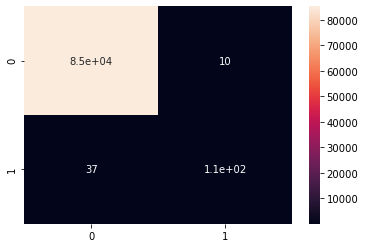

In [32]:
import seaborn as sns
sns.heatmap(cm, annot=True)

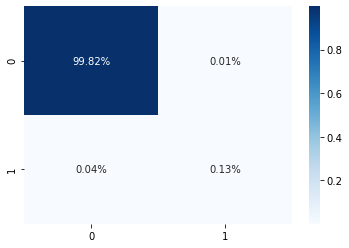

In [33]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

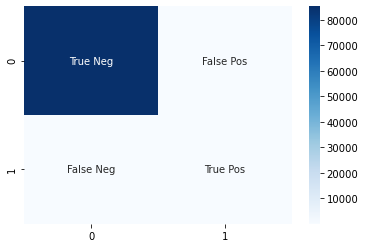

In [34]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [35]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

In [36]:
cm_matrix = confusion_matrix(y_expected,y_pred.round())

In [37]:
cm_matrix

array([[284283,     32],
       [   110,    382]], dtype=int64)

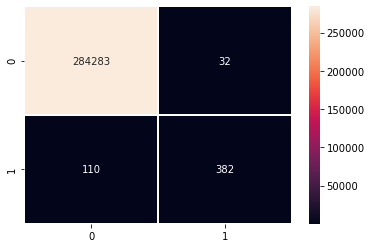

In [38]:
sns.heatmap(cm_matrix, annot=True,linewidths=1, fmt = 'd')

# Undersampling Techniques

In [39]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_found = len(fraud_indices)

In [40]:
number_records_found

492

In [41]:
normal_indices = data[data.Class == 0].index

In [42]:
random_normal_indices = np.random.choice(normal_indices,number_records_found,replace = False)

In [43]:
random_normal_indices = np.array(random_normal_indices)

In [44]:
len(random_normal_indices)

492

In [45]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [46]:
len(under_sample_indices)

984

In [47]:
under_sample_data = data.iloc[under_sample_indices,:]


In [48]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class' ]
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class' ]

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_undersample,y_undersample,test_size = 0.3)

In [50]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
______________________________________________________

In [52]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=5)

Epoch 1/5
22/22 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8983
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9259
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9360
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9506
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9520


In [53]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

In [54]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())

In [55]:
cnf_matrix

array([[143,   0],
       [ 12, 141]], dtype=int64)

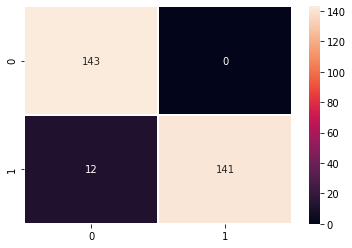

In [56]:
sns.heatmap(cnf_matrix,annot=True,linewidths=1,fmt='d')

In [72]:
y_pred = model.predict(X)
y_expected =  pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected,y_pred.round())


ValueError: Found input variables with inconsistent numbers of samples: [170589, 284807]

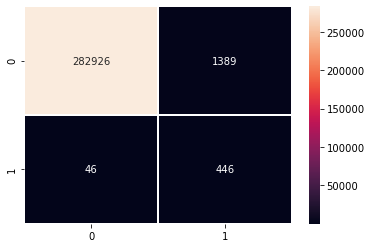

In [58]:
sns.heatmap(cnf_matrix,annot=True,linewidths=1,fmt='d')

# SMOTE

In [59]:
! pip install imbalanced-learn

In [60]:


!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\arvind\anaconda3\lib\site-packages (0.8.0)


In [61]:
!pip install delayed

In [62]:
!pip install smote

In [63]:
from imblearn.over_sampling import SMOTE

In [67]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [68]:
y_resample =  pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [70]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [71]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=5)

Epoch 1/5
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 2/5
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0068 - accuracy: 0.9983
Epoch 3/5
12439/12439 [==============================] - 13s 1ms/step - loss: 0.0057 - accuracy: 0.9986
Epoch 4/5
12439/12439 [==============================] - 13s 1ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 5/5
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0042 - accuracy: 0.9990


In [74]:
y_pred = model.predict(X_test)
y_expected =  pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected,y_pred.round())


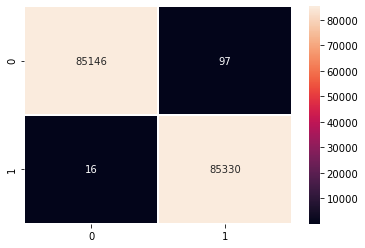

In [75]:
sns.heatmap(cnf_matrix,annot=True,linewidths=1,fmt='d')

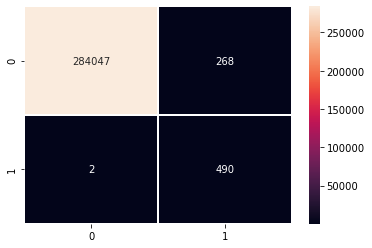

In [76]:
y_pred = model.predict(X)
y_expected =  pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected,y_pred.round())

sns.heatmap(cnf_matrix,annot=True,linewidths=1,fmt='d')
